Training Set RMSE: 0.5185329355465019

Test Set RMSE: 0.36331240911725393



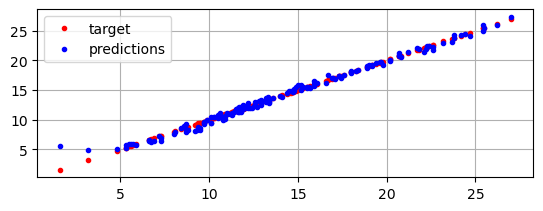

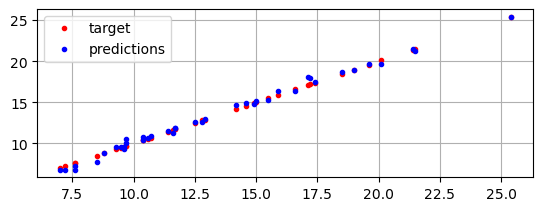

In [25]:
#importing used libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Defining RMSE function due to problems importing it
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))


### Reading Data 
df = pd.read_csv('http://www.statlearning.com/s/Advertising.csv', index_col=0)

### Slicing DataFrame
df = df[['TV', 'radio', 'sales']]
df.head()

### Splitting train/test datasets
X, y = df[['TV', 'radio']].to_numpy(), df[['sales']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20241)

### Adding Polynomial Features and Defining the model
pipeline = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), ##tested d = 2,3,4,5,6
                         LinearRegression())
### Training the model
pipeline.fit(X_train, y_train)

### Printing Metrics
print(f'Training Set RMSE: {root_mean_squared_error(y_train, pipeline.predict(X_train))}\n')
print(f'Test Set RMSE: {root_mean_squared_error(y_test, pipeline.predict(X_test))}\n')

### Plotting the Target Values and Predictions
plt.subplot(2,1,1)
plt.plot(y_train, y_train, 'r.', label='target')
plt.plot(y_train, pipeline.predict(X_train), 'b.', label='predictions')
plt.legend()
plt.grid()
plt.show()


plt.subplot(2,1,2)
plt.plot(y_test, y_test, 'r.', label='target')
plt.plot(y_test, pipeline.predict(X_test), 'b.', label='predictions')
plt.legend()
plt.grid()
plt.show()

#print(pipeline[1].coef_)

In [28]:
### Analysing most important features
X_train_new = pipeline[0].transform(X_train) ## Transform X_train to d=3 features

## Multiply the weight vectors for the std of the training set to see the most important features
w_normalized = pipeline[-1].coef_ * X_train_new.std(axis=0) 
print(f' w_normalized = {w_normalized}\n')

#np.abs(w_normalized).argsort()[:4:-1])
## Sort features to the ones with the highest values
np.flip(sorted(np.abs(w_normalized).argsort()))## Flips to see from ">" to "<".

 w_normalized = [[  7.78453275   0.45075909 -11.49883585   4.49538004  -0.27783697
    5.61725648  -0.65424205  -0.20790395   0.37463783]]



array([[2, 0, 5, 3, 6, 1, 8, 4, 7]])

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin


### Reading Data 
df = pd.read_csv('http://www.statlearning.com/s/Advertising.csv', index_col=0)

### Slicing DataFrame
df = df[['TV', 'radio', 'sales']]
df.head()

### Splitting train/test datasets
X, y = df[['TV', 'radio']].to_numpy(), df[['sales']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20241)

### Analysing most important features
X_train_new = pipeline[0].transform(X_train) ## Transform X_train to d=3 features

## Multiply the weight vectors for the std of the training set to see the most important features
w_normalized = pipeline[-1].coef_ * X_train_new.std(axis=0) 
print(f' w_normalized = {w_normalized}\n')

#np.abs(w_normalized).argsort()[:4:-1])
## Sort features to the ones with the highest values
## Flips to see from ">" to "<".
print(f'Sorted weights indexes: {np.flip(sorted(np.abs(w_normalized).argsort()[:4]))}\n') 


### Adding Custom Features and Defining the model
class CustomFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        #x1, x1^2, x1*x2, x1^3
        X_new = np.c_[X[:,0], X[:,0]**2, X[:,0]*X[:,1], X[:,0]**3]  
        return X_new
        
pipeline = make_pipeline(CustomFeatures(),
                         LinearRegression())
### Training the model
pipeline.fit(X_train, y_train)

### Printing Metrics
print(f'Training Set RMSE: {root_mean_squared_error(y_train, pipeline.predict(X_train))}\n')
print(f'Test Set RMSE: {root_mean_squared_error(y_test, pipeline.predict(X_test))}\n')

 w_normalized = [[  7.78453275   0.45075909 -11.49883585   4.49538004  -0.27783697
    5.61725648  -0.65424205  -0.20790395   0.37463783]]

Sorted weights indexes: [[2 0 5 3 6 1 8 4 7]]

Training Set RMSE: 0.6233186166938441

Test Set RMSE: 0.4170760346453218

